# Approximate Bayesian Computation

# Non-informative prior

## Method A testing

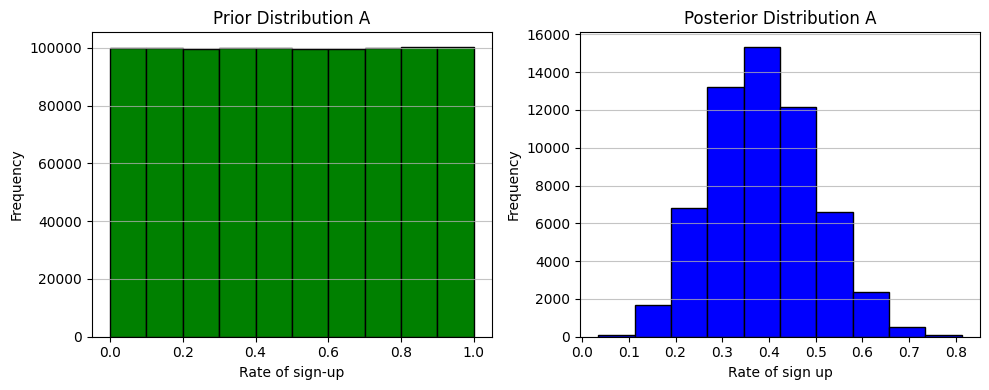

Number of draws left: 58857, 
 Posterior mean: 0.388, 
 Posterior median: 0.383, 
 Posterior 95% quantile interval: 0.184-0.617


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n_draws = 1000000  # number of draws/simulations
prior_rate = pd.Series(np.random.uniform(0, 1, size=n_draws))

# # Create a histogram
# plt.hist(prior_rate, bins=10, edgecolor='black',color='green')
# plt.title('Prior Distribution')
# plt.xlabel('Rate of sign-up')
# plt.ylabel('Frequency')
# plt.grid(axis='y', alpha=0.75)
# plt.show()

def generative_model(p):
    data = np.random.binomial(16, p)
    return data
    
observed_data = 6

sim_data = list()
for p in prior_rate:
    sim_data.append(generative_model(p))

post_rate = prior_rate[list(map(lambda x: x==observed_data, sim_data))]
    

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Histogram for prior_rateA (left subplot)
axes[0].hist(prior_rate, bins=10, edgecolor='black', color='green')
axes[0].set_title('Prior Distribution A')
axes[0].set_xlabel('Rate of sign-up')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='y', alpha=0.75)

axes[1].hist(post_rate, bins=10, edgecolor='black', color='blue')
axes[1].set_title('Posterior Distribution A')
axes[1].set_xlabel('Rate of sign up')
axes[1].set_ylabel('Frequency')
axes[1].grid(axis='y', alpha=0.75)


plt.tight_layout()
plt.show()

print('Number of draws left: %d, \n Posterior mean: %.3f, \n Posterior median: %.3f, \n Posterior 95%% quantile interval: %.3f-%.3f' % 
      (len(post_rate), post_rate.mean(), post_rate.median(), post_rate.quantile(.025), post_rate.quantile(.975)))


## Method A/B testing

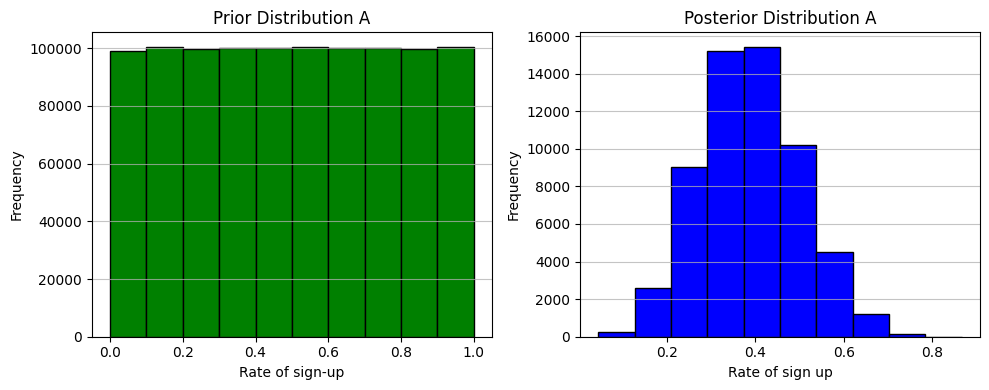

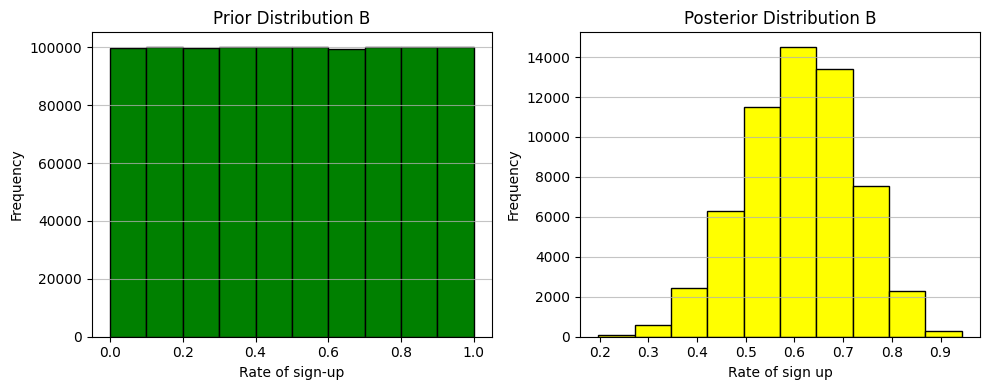

Number of draws left in A: 58618, 
Posterior mean: 0.389, 
Posterior median: 0.385, 
Posterior 95% quantile interval: 0.183-0.618
Number of draws left in B: 58885, 
Posterior mean: 0.611, 
Posterior median: 0.615, 
Posterior 95% quantile interval: 0.383-0.815


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n_draws = 1000000  # number of draws/simulations
prior_rateA = pd.Series(np.random.uniform(0, 1, size=n_draws))
prior_rateB = pd.Series(np.random.uniform(0, 1, size=n_draws))

def generative_model(p):
    data = np.random.binomial(16, p)
    return data

# Simulate data for A
sim_dataA = [generative_model(p) for p in prior_rateA]
# Simulate data for B
sim_dataB = [generative_model(p) for p in prior_rateB]

# Filter to get posterior distributions
post_rateA = prior_rateA[list(map(lambda x: x == 6, sim_dataA))]
post_rateB = prior_rateB[list(map(lambda x: x == 10, sim_dataB))]

# Plot Prior and Posterior for A
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Histogram for prior_rateA (left subplot)
axes[0].hist(prior_rateA, bins=10, edgecolor='black', color='green')
axes[0].set_title('Prior Distribution A')
axes[0].set_xlabel('Rate of sign-up')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='y', alpha=0.75)

# Histogram for post_rateA (right subplot)
axes[1].hist(post_rateA, bins=10, edgecolor='black', color='blue')
axes[1].set_title('Posterior Distribution A')
axes[1].set_xlabel('Rate of sign up')
axes[1].set_ylabel('Frequency')
axes[1].grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

# Plot Prior and Posterior for B
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Histogram for prior_rateB (left subplot)
axes[0].hist(prior_rateB, bins=10, edgecolor='black', color='green')
axes[0].set_title('Prior Distribution B')
axes[0].set_xlabel('Rate of sign-up')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='y', alpha=0.75)

# Histogram for post_rateB (right subplot)
axes[1].hist(post_rateB, bins=10, edgecolor='black', color='yellow')
axes[1].set_title('Posterior Distribution B')
axes[1].set_xlabel('Rate of sign up')
axes[1].set_ylabel('Frequency')
axes[1].grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

# Summary statistics for Posterior A
print('Number of draws left in A: %d, \nPosterior mean: %.3f, \nPosterior median: %.3f, \nPosterior 95%% quantile interval: %.3f-%.3f' % 
      (len(post_rateA), post_rateA.mean(), post_rateA.median(), post_rateA.quantile(.025), post_rateA.quantile(.975)))

# Summary statistics for Posterior B
print('Number of draws left in B: %d, \nPosterior mean: %.3f, \nPosterior median: %.3f, \nPosterior 95%% quantile interval: %.3f-%.3f' % 
      (len(post_rateB), post_rateB.mean(), post_rateB.median(), post_rateB.quantile(.025), post_rateB.quantile(.975)))


## Rate differences

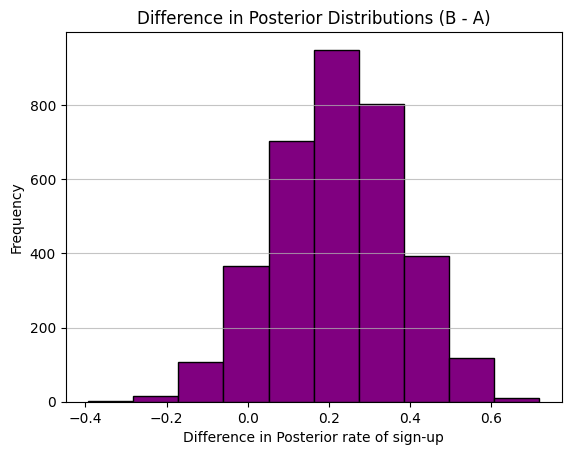

Proportion of samples where post_rateB > post_rateA: 0.028


In [3]:
# Ensure post_rateA and post_rateB have the same length by sampling if needed
min_length = min(len(post_rateA), len(post_rateB))

post_rateA_sample = post_rateA.sample(min_length, random_state=42)
post_rateB_sample = post_rateB.sample(min_length, random_state=42)

# Calculate the difference between the two posterior distributions
rate_diff = post_rateB_sample - post_rateA_sample

# Plot the histogram of the differences
plt.hist(rate_diff, bins=10, edgecolor='black', color='purple')
plt.title('Difference in Posterior Distributions (B - A)')
plt.xlabel('Difference in Posterior rate of sign-up')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


# Calculate the proportion of differences that are greater than zero
proportion_B_greater_A = sum(rate_diff > 0) / len(rate_diff)
print(f'Proportion of samples where post_rateB > post_rateA: {proportion_B_greater_A:.3f}')

## Expected profit

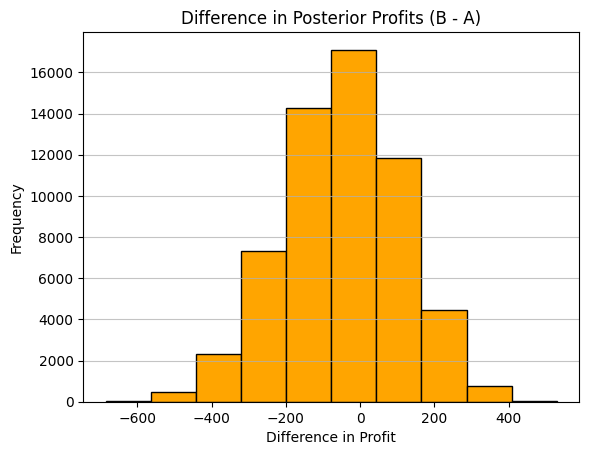

Proportion of profitB greater than profitA: 0.390


In [4]:
# Calculate profits based on the posterior distributions
profitA = post_rateA * 1000 - 30
profitB = post_rateB * 1000 - 300

# Ensure profitA and profitB have the same length by sampling if needed
min_length = min(len(profitA), len(profitB))

# Sample profits and reset indices
profitA_sample = profitA.sample(min_length, random_state=42).reset_index(drop=True)
profitB_sample = profitB.sample(min_length, random_state=42).reset_index(drop=True)

# Calculate the difference between the two posterior profits
profit_diff = profitB_sample - profitA_sample

# Plot the histogram of the profit differences
plt.hist(profit_diff, bins=10, edgecolor='black', color='orange')
plt.title('Difference in Posterior Profits (B - A)')
plt.xlabel('Difference in Profit')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Calculate the proportion of profitB greater than profitA
profitB_greater_profitA = sum(profitB_sample > profitA_sample) / len(profitA_sample)

# Print the result
print(f'Proportion of profitB greater than profitA: {profitB_greater_profitA:.3f}')


# Informative prior

## Method A testing

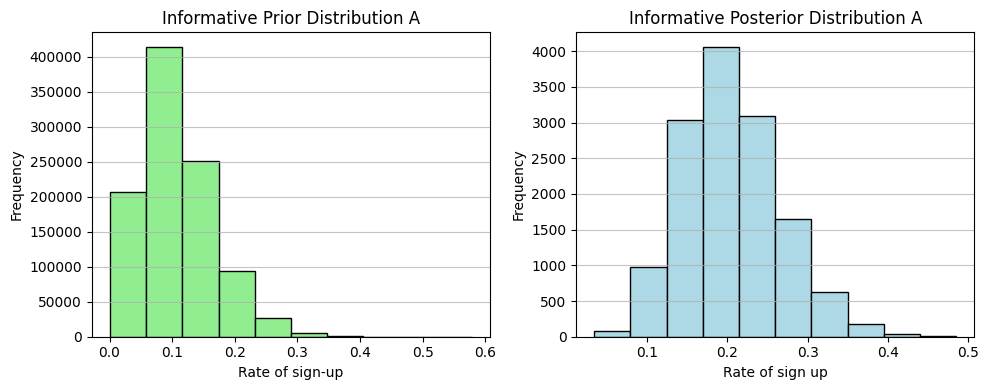

Number of draws left: 13747, 
 Posterior mean: 0.205, 
 Posterior median: 0.200, 
 Posterior 95% quantile interval: 0.101-0.334


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n_draws = 1000000  # number of draws/simulations
prior_rate = pd.Series(np.random.beta(3, 25, size=n_draws))

# # Create a histogram
# plt.hist(prior_rate, bins=10, edgecolor='black',color='green')
# plt.title('Prior Distribution')
# plt.xlabel('Rate of sign-up')
# plt.ylabel('Frequency')
# plt.grid(axis='y', alpha=0.75)
# plt.show()

def generative_model(p):
    data = np.random.binomial(16, p)
    return data
    
observed_data = 6

sim_data = list()
for p in prior_rate:
    sim_data.append(generative_model(p))

post_rate = prior_rate[list(map(lambda x: x==observed_data, sim_data))]
    

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Histogram for prior_rateA (left subplot)
axes[0].hist(prior_rate, bins=10, edgecolor='black', color='lightgreen')
axes[0].set_title('Informative Prior Distribution A')
axes[0].set_xlabel('Rate of sign-up')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='y', alpha=0.75)

axes[1].hist(post_rate, bins=10, edgecolor='black', color='lightblue')
axes[1].set_title('Informative Posterior Distribution A')
axes[1].set_xlabel('Rate of sign up')
axes[1].set_ylabel('Frequency')
axes[1].grid(axis='y', alpha=0.75)


plt.tight_layout()
plt.show()

print('Number of draws left: %d, \n Posterior mean: %.3f, \n Posterior median: %.3f, \n Posterior 95%% quantile interval: %.3f-%.3f' % 
      (len(post_rate), post_rate.mean(), post_rate.median(), post_rate.quantile(.025), post_rate.quantile(.975)))


## Method A/B testing

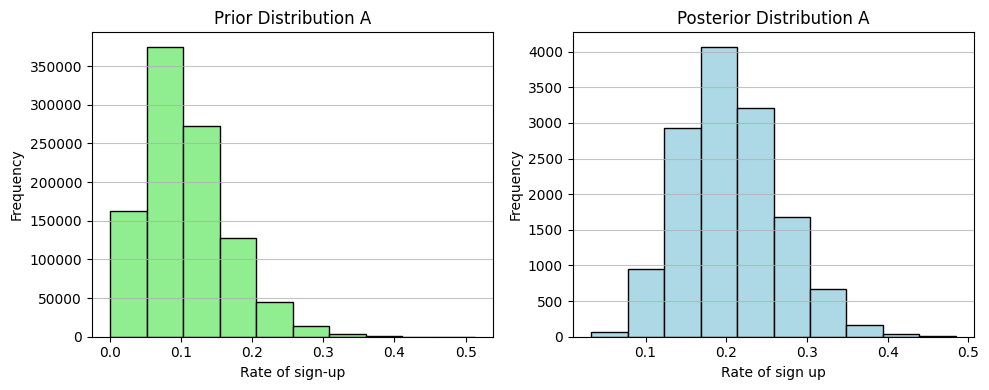

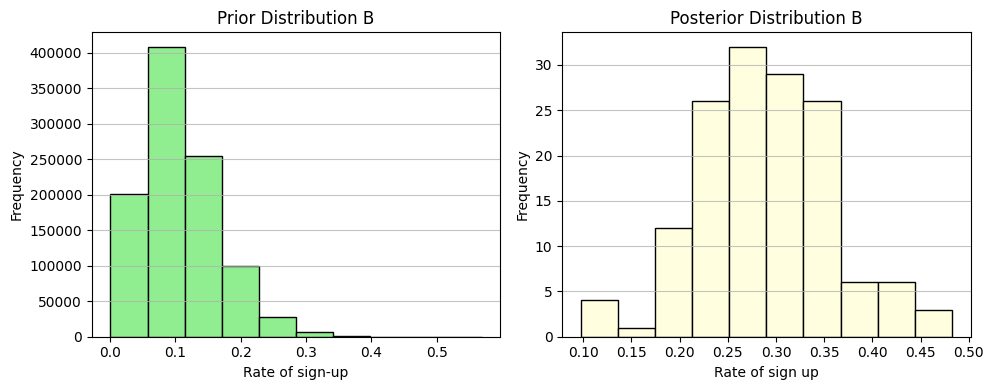

Number of draws left in A: 13798, 
Posterior mean: 0.206, 
Posterior median: 0.201, 
Posterior 95% quantile interval: 0.101-0.334
Number of draws left in B: 145, 
Posterior mean: 0.289, 
Posterior median: 0.286, 
Posterior 95% quantile interval: 0.151-0.434


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n_draws = 1000000  # number of draws/simulations
prior_rateA = pd.Series(np.random.beta(3,25, size=n_draws))
prior_rateB = pd.Series(np.random.beta(3,25, size=n_draws))

def generative_model(p):
    data = np.random.binomial(16, p)
    return data

# Simulate data for A
sim_dataA = [generative_model(p) for p in prior_rateA]
# Simulate data for B
sim_dataB = [generative_model(p) for p in prior_rateB]

# Filter to get posterior distributions
post_rateA = prior_rateA[list(map(lambda x: x == 6, sim_dataA))]
post_rateB = prior_rateB[list(map(lambda x: x == 10, sim_dataB))]

# Plot Prior and Posterior for A
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Histogram for prior_rateA (left subplot)
axes[0].hist(prior_rateA, bins=10, edgecolor='black', color='lightgreen')
axes[0].set_title('Prior Distribution A')
axes[0].set_xlabel('Rate of sign-up')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='y', alpha=0.75)

# Histogram for post_rateA (right subplot)
axes[1].hist(post_rateA, bins=10, edgecolor='black', color='lightblue')
axes[1].set_title('Posterior Distribution A')
axes[1].set_xlabel('Rate of sign up')
axes[1].set_ylabel('Frequency')
axes[1].grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

# Plot Prior and Posterior for B
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Histogram for prior_rateB (left subplot)
axes[0].hist(prior_rateB, bins=10, edgecolor='black', color='lightgreen')
axes[0].set_title('Prior Distribution B')
axes[0].set_xlabel('Rate of sign-up')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='y', alpha=0.75)

# Histogram for post_rateB (right subplot)
axes[1].hist(post_rateB, bins=10, edgecolor='black', color='lightyellow')
axes[1].set_title('Posterior Distribution B')
axes[1].set_xlabel('Rate of sign up')
axes[1].set_ylabel('Frequency')
axes[1].grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

# Summary statistics for Posterior A
print('Number of draws left in A: %d, \nPosterior mean: %.3f, \nPosterior median: %.3f, \nPosterior 95%% quantile interval: %.3f-%.3f' % 
      (len(post_rateA), post_rateA.mean(), post_rateA.median(), post_rateA.quantile(.025), post_rateA.quantile(.975)))

# Summary statistics for Posterior B
print('Number of draws left in B: %d, \nPosterior mean: %.3f, \nPosterior median: %.3f, \nPosterior 95%% quantile interval: %.3f-%.3f' % 
      (len(post_rateB), post_rateB.mean(), post_rateB.median(), post_rateB.quantile(.025), post_rateB.quantile(.975)))


## Rate differences 

NaN values in post_rateA: 0
NaN values in post_rateB: 0
NaN values in rate_diff: 0


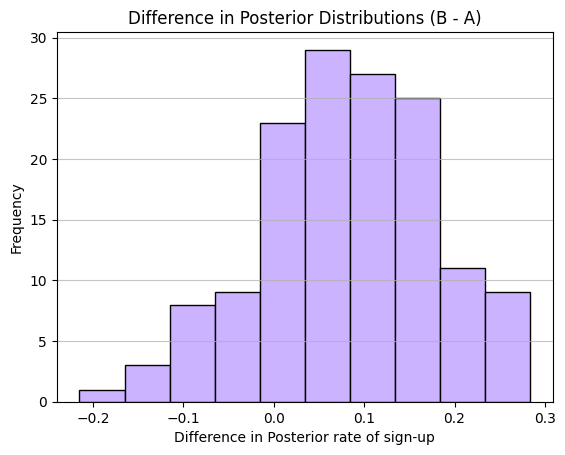

Proportion of samples where post_rateB > post_rateA: 0.793


In [7]:
# Check for NaN values in post_rateA and post_rateB
print(f'NaN values in post_rateA: {post_rateA.isna().sum()}')
print(f'NaN values in post_rateB: {post_rateB.isna().sum()}')

# Ensure post_rateA and post_rateB have the same length by sampling if needed
min_length = min(len(post_rateA), len(post_rateB))

post_rateA_sample = post_rateA.sample(min_length, random_state=42).reset_index(drop=True)
post_rateB_sample = post_rateB.sample(min_length, random_state=42).reset_index(drop=True)

# Calculate the difference between the two posterior distributions
rate_diff = post_rateB_sample - post_rateA_sample

# Check for NaN values in the rate_diff
print(f'NaN values in rate_diff: {np.isnan(rate_diff).sum()}')

# If there are NaN values, you can drop them
rate_diff = rate_diff.dropna()

# Plot the histogram of the differences
plt.hist(rate_diff, bins=10, edgecolor='black', color=(0.8, 0.7, 1.0))
plt.title('Difference in Posterior Distributions (B - A)')
plt.xlabel('Difference in Posterior rate of sign-up')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Calculate the proportion of differences that are greater than zero
proportion_B_greater_A = sum(rate_diff > 0) / len(rate_diff)
print(f'Proportion of samples where post_rateB > post_rateA: {proportion_B_greater_A:.3f}')


## Expected profit

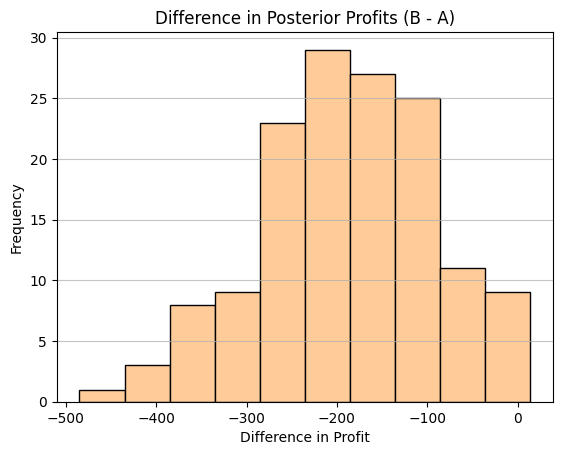

Proportion of profitB greater than profitA: 0.014


In [8]:
# Calculate profits based on the posterior distributions
profitA = post_rateA * 1000 - 30
profitB = post_rateB * 1000 - 300

# Ensure profitA and profitB have the same length by sampling if needed
min_length = min(len(profitA), len(profitB))

# Sample profits and reset indices
profitA_sample = profitA.sample(min_length, random_state=42).reset_index(drop=True)
profitB_sample = profitB.sample(min_length, random_state=42).reset_index(drop=True)

# Calculate the difference between the two posterior profits
profit_diff = profitB_sample - profitA_sample

# Plot the histogram of the profit differences
plt.hist(profit_diff, bins=10, edgecolor='black', color=(1.0, 0.8, 0.6))
plt.title('Difference in Posterior Profits (B - A)')
plt.xlabel('Difference in Profit')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Calculate the proportion of profitB greater than profitA
profitB_greater_profitA = sum(profitB_sample > profitA_sample) / len(profitA_sample)

# Print the result
print(f'Proportion of profitB greater than profitA: {profitB_greater_profitA:.3f}')
